# Phase Estimation

Here we will apply the standard phase estimation algorithm to the single qubit operator $U=P(5\pi /4)$ to find the eigenvalue of the eigenvector $|1\rangle$. We already know the exact eigenvalue to be $e^{i\frac{5\pi}{4}}=e^{2\pi i(\frac{5}{8})} = e^{2 \pi i \theta}$, so the exact result would be $\theta =5/8$. Hence we will use 3 qubits here to be able to store the *exact* result to test the algorithm. Note the algorithm returns the value $2^n \theta$, when n storage bits are used so we will finally have to divide by $2^n = 8$.

In [1]:
import numpy as np
from numpy import pi
from qiskit import *
from qiskit.visualization import plot_histogram,plot_state_qsphere, plot_bloch_multivector, plot_state_city

In the circuit we have first three qubits as one register to store the result and $q_3$ will be the eigenvector of $U$. First we apply X gate to q_3 so that it becomes the required eigenvector $|1\rangle$ of $U$.

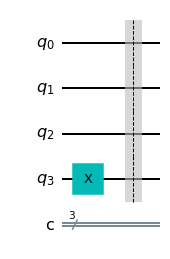

In [2]:
qc = QuantumCircuit(4,3)
qc.x(3)
qc.barrier()
qc.draw('mpl')

Now we apply H gate to all qubits in the storage register and then apply controlled $U^{2^k}$ gates with $q_k$ as control and $q_3$ as target for $k=0,1,2$, as shown in below circuit.

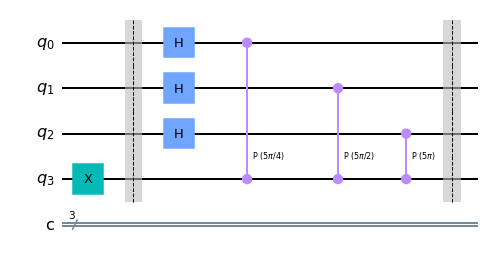

In [3]:
for i in range(3):
    qc.h(i)
for i in range(3):
    qc.cp(5*pi/2**(2-i),i,3)
qc.barrier()
qc.draw('mpl')

As next step of the algorithm, we apply inverse QFT on the storage register as shown below (inverse QFT part of circuit is placed between barriers for clarity).

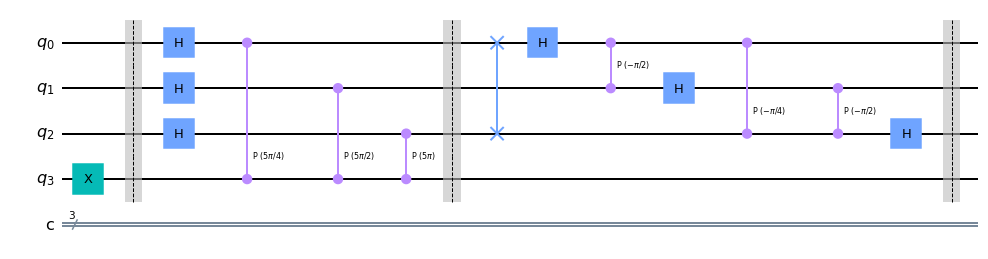

In [4]:
n = 3

for i in range(n//2):
    qc.swap(i,n-i-1)

for i in range(n):
    for j in range(i):
        qc.cp(-pi/2**(i-j),i,j)
    qc.h(i)

qc.barrier()
qc.draw('mpl')

Finally we measure the qubits in the storage register and the result is stored in the classical 3 bit register. The complete circuit for the algorithm is shown below.

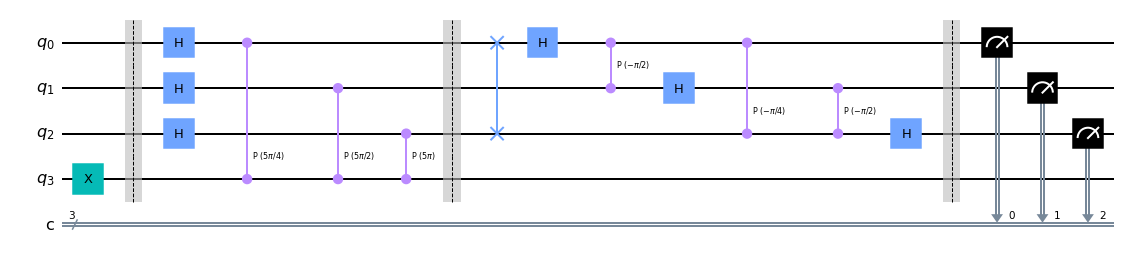

In [5]:
for i in range(3):
    qc.measure(i,i);
qc.draw('mpl')

Let us now run a simulation of the above circuit and plot a histogram of the result.

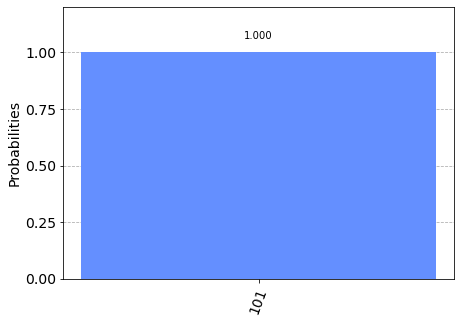

In [6]:
sim = Aer.get_backend('qasm_simulator')
job = execute(qc,sim,shots=1)
result = job.result()
count = result.get_counts()

plot_histogram(count)

The result obtained is 101 (binary) which is 5 in base 10 and thus the value of $\theta = 5/2^n =5/8$. This matches the expected value of $\theta$ and the algorithm passes the test case.